# Import Packages

In [1]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img


import numpy as np
import cv2
import os
import re


from matplotlib import pyplot as plt

In [2]:
model = load_model(os.getcwd()+r"\resnet50_chest_xray_classification_model")

In [3]:
input_output = os.getcwd()+"\Input_Output"

In [4]:
ori_images  = []
input_images = []
labels = []

for image_file in os.listdir(input_output):
    img_path = os.path.join(input_output, image_file)
    img_label = re.findall(r'\b(\w+-)\b',image_file)[0][:-1]
    print(img_path, img_label)

    ori_image = load_img(img_path, target_size=(224, 224))
    input_image = img_to_array(ori_image)
    input_image = preprocess_input(input_image)
    input_image = np.expand_dims(input_image, axis=0)

    ori_images.append(ori_image)
    input_images.append(input_image)
    labels.append(img_label)

C:\Users\User\Code\WID3008 Image Processing\Input_Output\COVID-513.png COVID
C:\Users\User\Code\WID3008 Image Processing\Input_Output\COVID-514.png COVID
C:\Users\User\Code\WID3008 Image Processing\Input_Output\COVID-515.png COVID
C:\Users\User\Code\WID3008 Image Processing\Input_Output\COVID-516.png COVID
C:\Users\User\Code\WID3008 Image Processing\Input_Output\Lung_Opacity-533.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Input_Output\Lung_Opacity-534.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Input_Output\Lung_Opacity-535.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Input_Output\Lung_Opacity-536.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Input_Output\Lung_Opacity-537.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Input_Output\Lung_Opacity-538.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Input_Output\Lung_Opacity-539.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Input_Outpu

# Input 

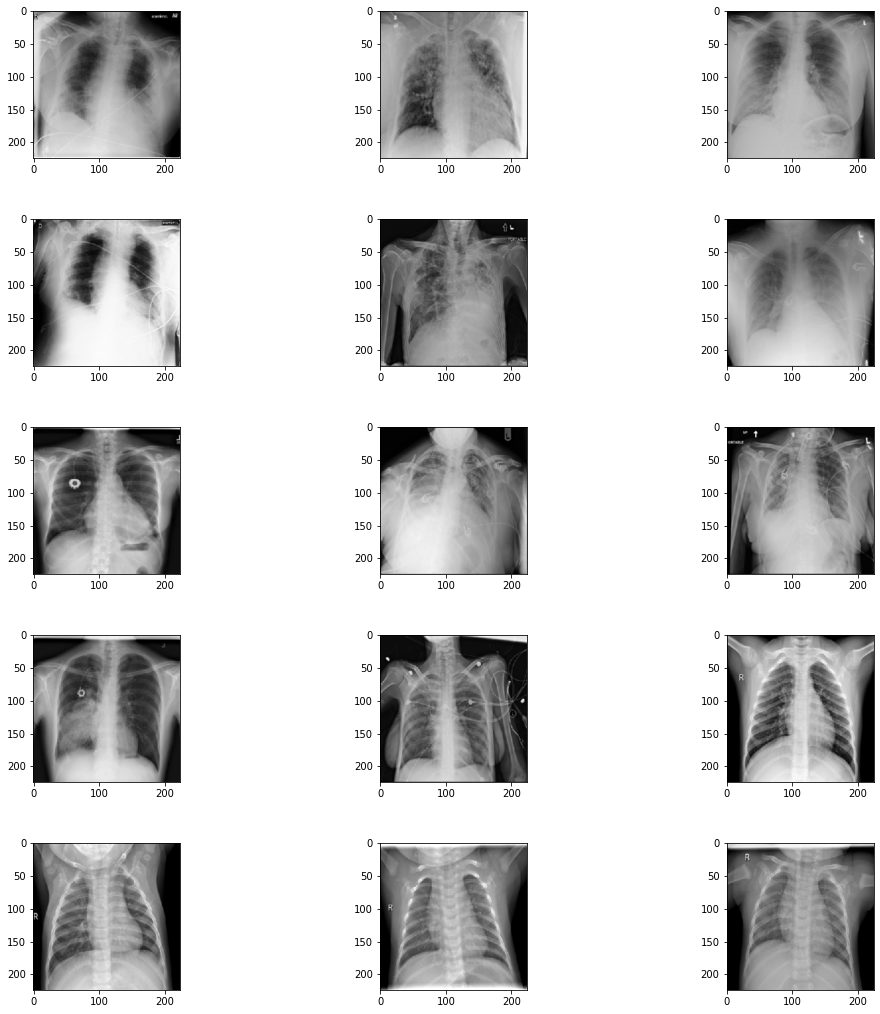

In [13]:
figure, axs = plt.subplots(5, 3, figsize=(15, 15))
figure.tight_layout(pad=4)
axs = axs.flatten()
for ori_image, ax in zip(ori_images, axs):
    ax.imshow(ori_image)
    
figure.savefig("Input.png")

# Output

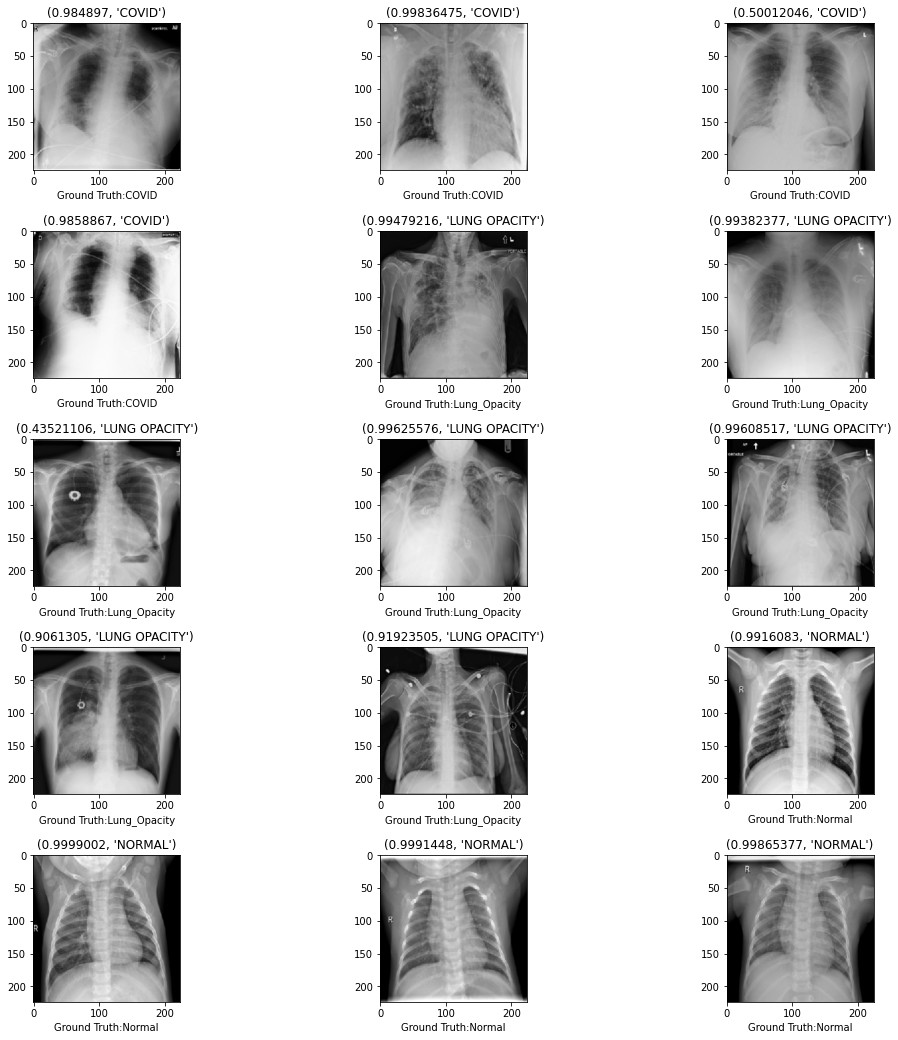

In [16]:
classes = ['COVID', 'LUNG OPACITY', 'NORMAL']
figure, axs = plt.subplots(5, 3, figsize=(15, 15))
figure.tight_layout(pad=4)
axs = axs.flatten()
i=0
for ori_image, input_image, ax, label in zip(ori_images, input_images, axs, labels):
    result = model.predict(input_image)
    category = np.argmax(result, axis=1)[0]
    category = classes[category]
    probability = result.max()
    
    ax.imshow(ori_image)
    ax.title.set_text(f"{probability, category}".format(probability, category))
    ax.set_xlabel("Ground Truth:{}".format(labels[i]))
    i+=1
    
figure.savefig("Output.png")